# Simulaciones

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def make_corr_matrix(groups: list, corrs: list)->np.ndarray:
    mat_holder = np.zeros(shape=(sum(groups), sum(groups)))
    for index,group in enumerate(groups):
        if index == 0:
            myrange = list(range(0, group))
            index_i = 0
            index_j = 0
            for index_i in myrange:
                for index_j in myrange:
                    mat_holder[index_i, index_j] = corrs[index]
        else:
            myrange = list(range(sum(groups[:index]), sum(groups[:index+1])))
            for index_i in myrange:
                for index_j in myrange:
                    mat_holder[index_i, index_j] = corrs[index]
    np.fill_diagonal(mat_holder, 1.0)
    return mat_holder

In [15]:
make_corr_matrix([4,2,2], [0.2, 0.3,0.4])

array([[1. , 0.2, 0.2, 0.2, 0. , 0. , 0. , 0. ],
       [0.2, 1. , 0.2, 0.2, 0. , 0. , 0. , 0. ],
       [0.2, 0.2, 1. , 0.2, 0. , 0. , 0. , 0. ],
       [0.2, 0.2, 0.2, 1. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 1. , 0.3, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.3, 1. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 1. , 0.4],
       [0. , 0. , 0. , 0. , 0. , 0. , 0.4, 1. ]])

In [4]:
make_corr_matrix([5, 2, 3], [0.1, 0.3, 0.7])

array([[1. , 0.1, 0.1, 0.1, 0.1, 0. , 0. , 0. , 0. , 0. ],
       [0.1, 1. , 0.1, 0.1, 0.1, 0. , 0. , 0. , 0. , 0. ],
       [0.1, 0.1, 1. , 0.1, 0.1, 0. , 0. , 0. , 0. , 0. ],
       [0.1, 0.1, 0.1, 1. , 0.1, 0. , 0. , 0. , 0. , 0. ],
       [0.1, 0.1, 0.1, 0.1, 1. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 1. , 0.3, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.3, 1. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 0.7, 0.7],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.7, 1. , 0.7],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.7, 0.7, 1. ]])

## Simulando retornos a través de cholensky

In [17]:
corr_matrix = make_corr_matrix([5, 2, 3], [0.1, 0.3, 0.7])
number_of_obs = 30
number_of_assets = corr_matrix.shape[0]
# En caso de que la matriz sea distinta de cero 
#means = np.zeros(number_of_assets)
Means = np.full((number_of_obs, number_of_assets), 0)


In [56]:
Z = np.random.normal(size = number_of_assets * number_of_obs)
Z.shape

(300,)

In [57]:
Z = Z.reshape((number_of_assets,number_of_obs))
Z.shape

(10, 30)

In [58]:
L = np.linalg.cholesky(corr_matrix)
L.shape

(10, 10)

In [52]:
daily_returns =  Means.T + np.inner(L, np.transpose(Z))

A continuación se tienen n columnas (una para cada día) y 10 filas (una para cada activo)

In [55]:
np.corrcoef(daily_returns)

array([[ 1.        ,  0.22646755,  0.08145829, -0.08281455,  0.42325473,
        -0.10644195,  0.14737762, -0.03641644, -0.24399962, -0.09603841],
       [ 0.22646755,  1.        , -0.13914379,  0.22655251,  0.21088993,
         0.27425948,  0.26532758,  0.24731743, -0.14242055,  0.1561402 ],
       [ 0.08145829, -0.13914379,  1.        ,  0.35044358,  0.13542268,
         0.14593958, -0.24577027, -0.20368694, -0.18011031,  0.07935237],
       [-0.08281455,  0.22655251,  0.35044358,  1.        , -0.19804309,
         0.24945602,  0.03177145,  0.27089469,  0.31809401,  0.48293272],
       [ 0.42325473,  0.21088993,  0.13542268, -0.19804309,  1.        ,
         0.02786284, -0.0591078 , -0.19437431, -0.3796441 , -0.29814607],
       [-0.10644195,  0.27425948,  0.14593958,  0.24945602,  0.02786284,
         1.        , -0.01315713,  0.06612202,  0.10082268,  0.29758858],
       [ 0.14737762,  0.26532758, -0.24577027,  0.03177145, -0.0591078 ,
        -0.01315713,  1.        ,  0.18024446

In [41]:
daily_returns.min()

-2.4073570332234926

In [42]:
daily_returns.mean()

0.00020890518279492436

In [59]:
daily_returns.max()

2.768906980812448

<AxesSubplot:ylabel='Density'>

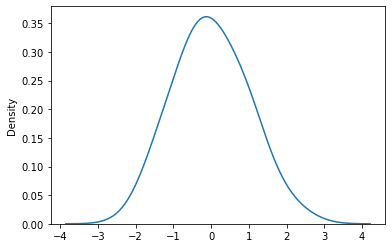

In [46]:
sns.kdeplot(daily_returns.flatten(), bw_method=0.5, fill=False, alpha = 1)

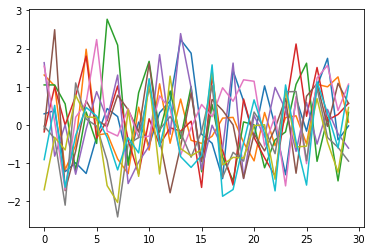

In [60]:
plt.plot(daily_returns.T);